# Global sea level budget
Check how the components add up


In [42]:
import numpy as np
import pandas as pd
import SeaLevelContrib as slc
import matplotlib.pyplot as plt
import importlib

In [79]:
importlib.reload(slc)

<module 'SeaLevelContrib' from '/Users/dewi/Work/Project_SeaLevelBudgets/Notebooks/SeaLevelContrib.py'>

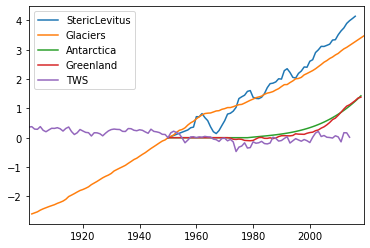

In [88]:
GloSLDang19_df = slc.GloSLDang19()

glac_df = slc.glaciers_m15(tg_id = None, extrap=True, del_green=True)
ant_df = slc.ant_rignot19_glo()  #imbie or rignot19
#ant_df = slc.ant_imbie_glo(extrap=True) 
green_df = slc.green_mouginot19_glo()
tws_df = slc.TWS_glo()

sealevel_df = slc.LevitusSL(extrap_back = True)
# Extrapollate to 1950?
sealevel_df = sealevel_df.join([glac_df, ant_df, green_df, tws_df], how='outer')
sealevel_df = sealevel_df - sealevel_df.loc[1950]
sealevel_df.plot()

In [94]:
sealevel_df['Total'] = sealevel_df.sum(axis=1)
sealevel_df.index.names = ['time']
#sealevel_df.iloc[-10:]
sealevel_df.loc[1950:]

StericLevitus  Glaciers  Antarctica  Greenland       TWS      Total
time                                                                       
1950.0       0.000000  0.000000    0.000000   0.000000  0.000000   0.000000
1951.0       0.037695  0.044387    0.000000   0.000000  0.166306   1.490331
1952.0       0.075390  0.093377    0.000000   0.000000  0.221953   2.344313
1953.0       0.113085  0.180265    0.000000   0.000000  0.176144   2.816963
1954.0       0.150780  0.251949    0.000000   0.000000  0.127677   3.182430
...               ...       ...         ...        ...       ...        ...
2015.0       4.064255  3.211698    1.160647   1.192972       NaN  57.777433
2016.0       4.142926  3.276466    1.245171   1.265806       NaN  59.582218
2017.0            NaN  3.341234    1.334176   1.352722       NaN  36.168797
2018.0            NaN  3.406002    1.427791   1.382194       NaN  37.295927
2019.0            NaN  3.470770         NaN        NaN       NaN  20.824621

[70 rows x 6 columns]

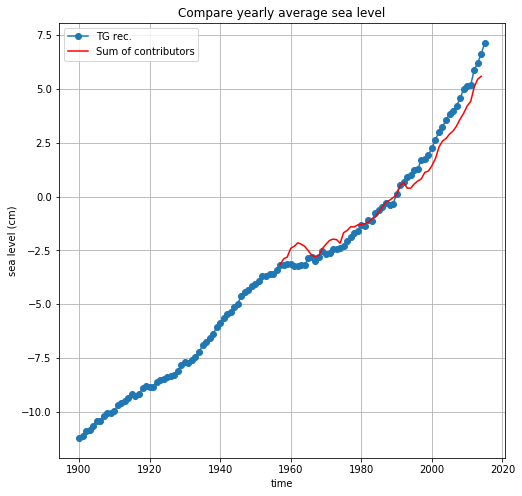

In [61]:
#Plot time series
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(GloSLDang19_df - GloSLDang19_df.loc[1953:2018].mean(), 'o-', label='TG rec.')
ax.plot(sealevel_df.Total - sealevel_df.Total.mean() , 'r-', label='Sum of contributors')

#ax.set_aspect(1)
#ax.set_xlim([ys,2020])
plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title('Compare yearly average sea level')
ax.grid(True)
plt.legend(loc='upper left')

The sum of contributors is not high enough compared to the reconstruction. Could missing glaciers and deep ocean fill the gap?
Deep ocean OHC increase is around 5% of the top 2000m (Zanna et al. 2019 consistent with Gebbie et al. 2019) . This is not enough to bridge the gap.

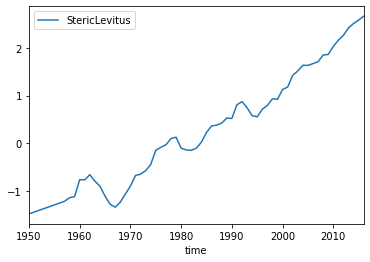

In [82]:
df = slc.LevitusSL(extrap_back = True)
df.plot()